In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Nueva sección

In [ ]:
#parte 1
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/ML/datasets/titanic.csv')

In [ ]:
print(data.head)

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [ ]:
#parte 2
%matplotlib inline
from sklearn.datasets import fetch_california_housing
california=fetch_california_housing()

print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
california.data.shape

(20640, 8)

In [ ]:
california.target.shape

(20640,)

In [ ]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
import pandas as pd
california_df=pd.DataFrame(california.data,
                           columns=california.feature_names)
california_df['MedHouseValue']=pd.Series(california.target)
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# Analizar el Dataset
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


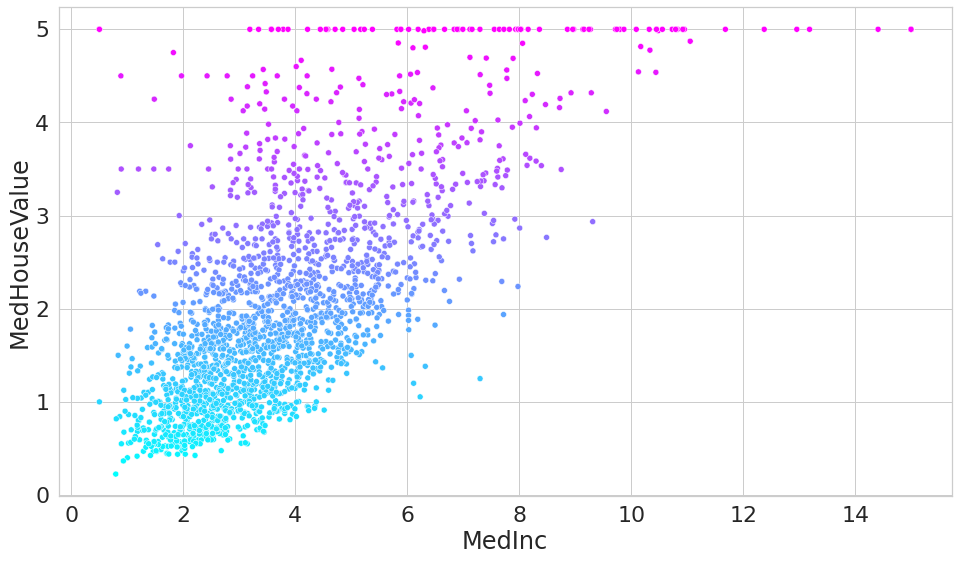

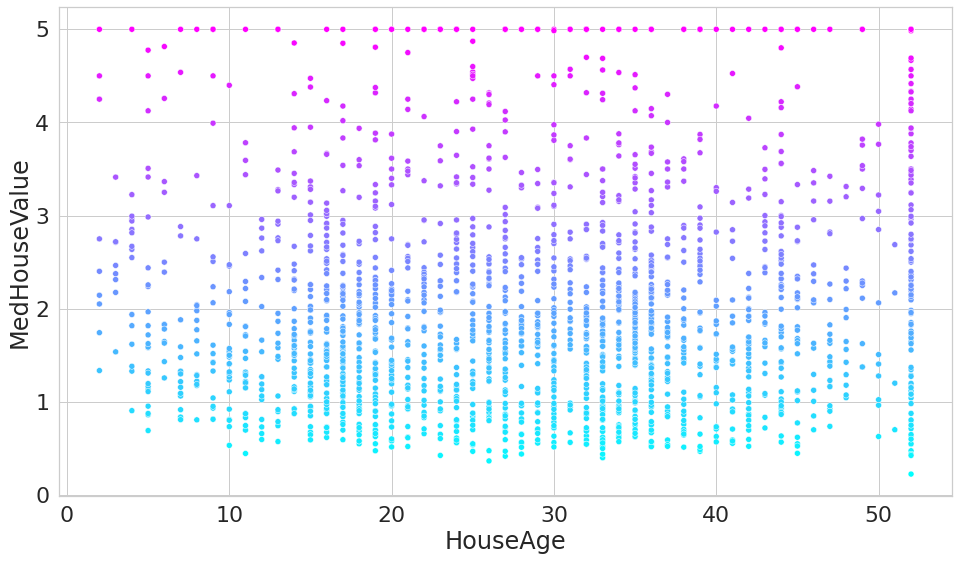

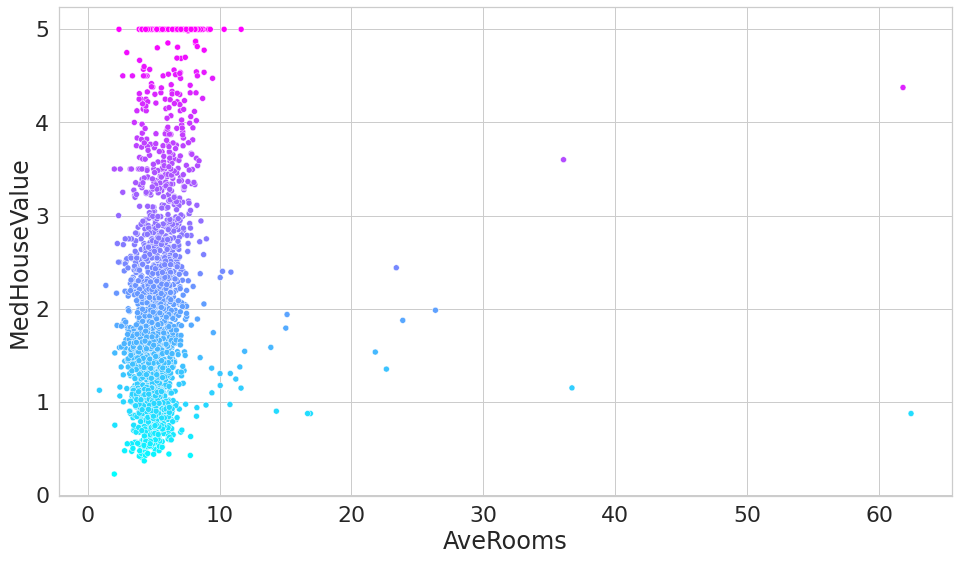

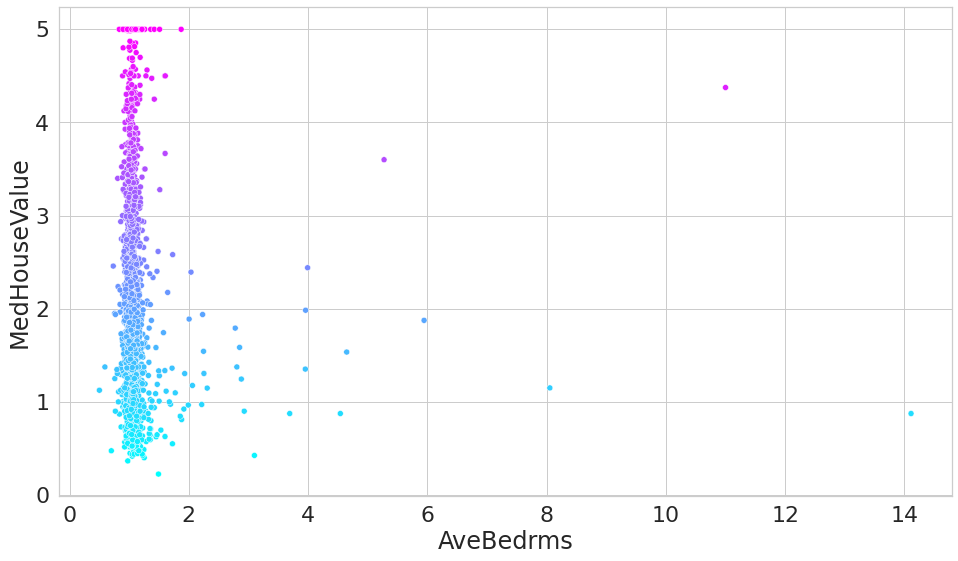

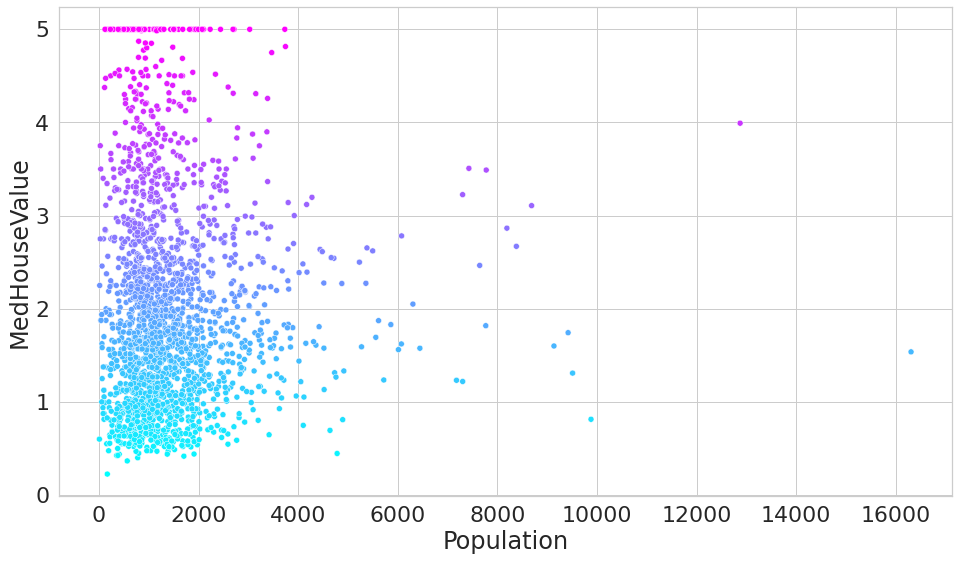

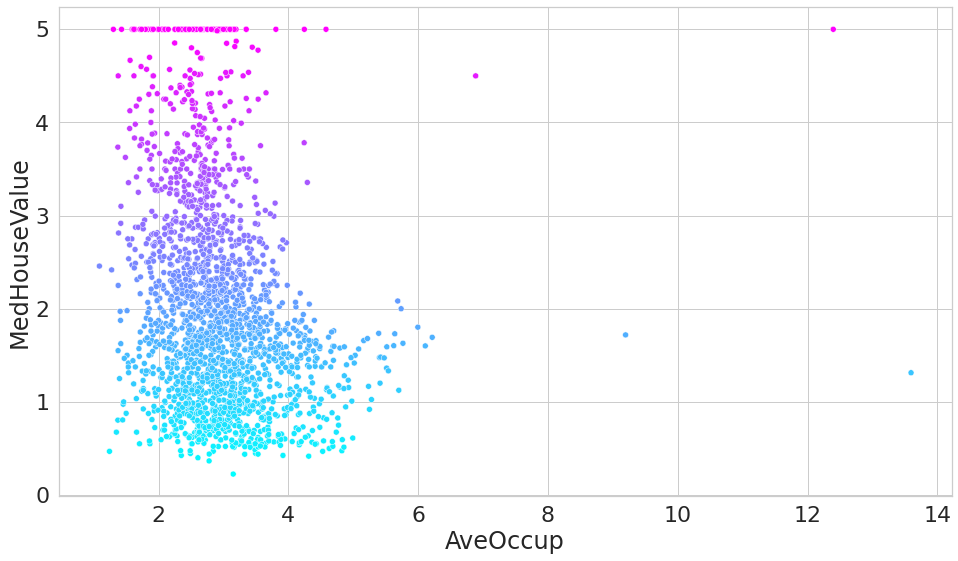

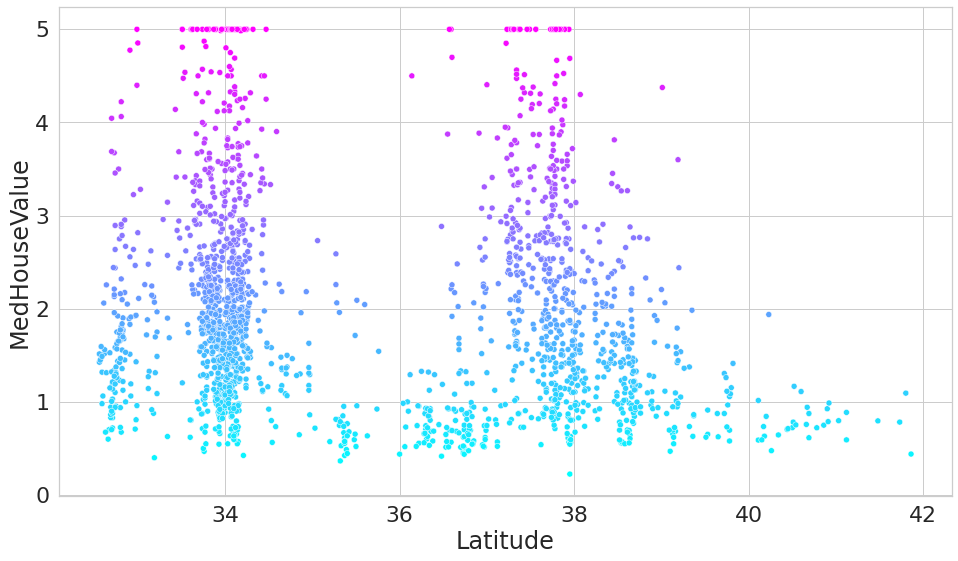

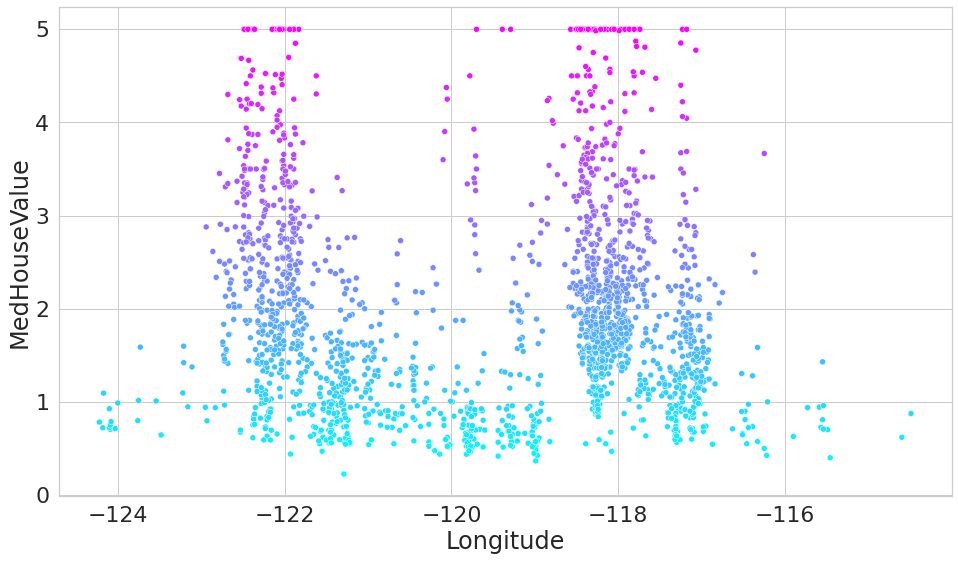

In [ ]:
sample_df = california_df.sample(frac=0.1, random_state=17)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
sns.set_style('whitegrid') 

for feature in california.feature_names:
     plt.figure(figsize=(16, 9))
     sns.scatterplot(data=sample_df, x=feature, 
                     y='MedHouseValue', hue='MedHouseValue', 
                     palette='cool', legend=False)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(california.data,
                                                  california.target,
                                                  random_state=11)


In [ ]:
X_train.shape

(15480, 8)

In [ ]:
X_test.shape

(5160, 8)

In [ ]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)
# Coeficientes del Modelo
for i, name in enumerate(california.feature_names):
     print(f'{name:>10}: {linear_regression.coef_[i]}')

    MedInc: 0.4377030215382206
  HouseAge: 0.009216834565797749
  AveRooms: -0.10732526637360926
 AveBedrms: 0.6117133073918087
Population: -5.756822009275742e-06
  AveOccup: -0.003384566465716442
  Latitude: -0.4194818609649067
 Longitude: -0.4337713349874023


In [ ]:
# Intercepción de la ecuación del modelo
linear_regression.intercept_

-36.8829506560556

In [ ]:
predicted = linear_regression.predict(X_test)
expected = y_test
predicted[:5]

array([1.25396876, 2.34693107, 2.03794745, 1.8701254 , 2.53608339])

In [ ]:
expected[:5]

array([0.762, 1.732, 1.125, 1.37 , 1.856])

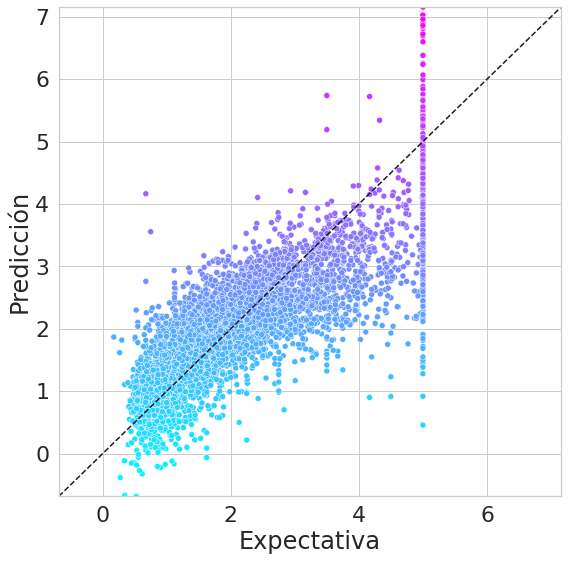

In [ ]:
df = pd.DataFrame()
df['Expectativa'] = pd.Series(expected)
df['Predicción'] = pd.Series(predicted)

figure = plt.figure(figsize=(9, 9))

axes = sns.scatterplot(data=df, x='Expectativa', y='Predicción', 
     hue='Predicción', palette='cool', legend=False)

start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())
axes.set_xlim(start, end)
axes.set_ylim(start, end)
line = plt.plot([start, end], [start, end], 'k--')

In [ ]:
from sklearn import metrics

metrics.r2_score(expected, predicted)

0.6008983115964333

In [ ]:
metrics.mean_squared_error(expected, predicted)

0.5350149774449117

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge
estimators={
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

from sklearn.model_selection import KFold, cross_val_score
for estimator_name, estimator_object in estimators.items():
     kfold = KFold(n_splits=10, random_state=11, shuffle=True)
     scores = cross_val_score(estimator=estimator_object, 
         X=california.data, y=california.target, cv=kfold,
         scoring='r2')
     print(f'{estimator_name:>16}: ' + 
           f'mean of r2 scores={scores.mean():.3f}')

LinearRegression: mean of r2 scores=0.599
      ElasticNet: mean of r2 scores=0.423
           Lasso: mean of r2 scores=0.285
           Ridge: mean of r2 scores=0.599


Entregables para la sección
1. Escriba la ecuaci´on resultante seg´un los coeficientes calculados por el modelo.

MedInc: 0.4377030215382206
  HouseAge: 0.009216834565797749
  AveRooms: -0.10732526637360926
 AveBedrms: 0.6117133073918087
Population: -5.756822009275742e-06
  AveOccup: -0.003384566465716442
  Latitude: -0.4194818609649067
 Longitude: -0.4337713349874023

Intercepción de la ecuación del modelo
-36.8829506560556
 
 Ecuación:
 y=0.437(x1)+0.009(x2)+(-0.107)x3+0.611(x4)+(-5.757)x5+(-0.003)x6+(-0.419)x7+(-0.434)x8+(-36.88)
2. ¿C´ual fue el valor de R2 obtenido y que nos indica este valor?

0.6008983115964333
Este valor nos indica qué tan cerca se encuentra los datos a la ecuación, mientras más se acerca al 100% mejor se ajusta el modelo a los datos.

In [ ]:
#parte 3
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
dataframe=pd.read_csv(r"/content/drive/MyDrive/ML/datasets/usuarios_win_mac_lin.csv")
dataframe.head()


,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [ ]:
dataframe.describe()
dataframe.info()
dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duracion  170 non-null    float64
 1   paginas   170 non-null    int64  
 2   acciones  170 non-null    int64  
 3   valor     170 non-null    int64  
 4   clase     170 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 6.8 KB


,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2
...,...,...,...,...,...
165,13.0,1,7,42,0
166,12.0,1,2,6,0
167,13.0,1,3,9,0
168,13.0,1,7,28,0


In [ ]:
print(dataframe.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


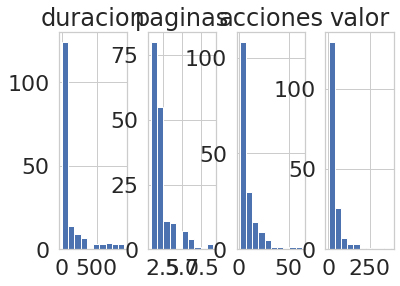

In [ ]:
dataframe.drop(['clase'],axis=1).hist(layout=(1,4))
plt.show()

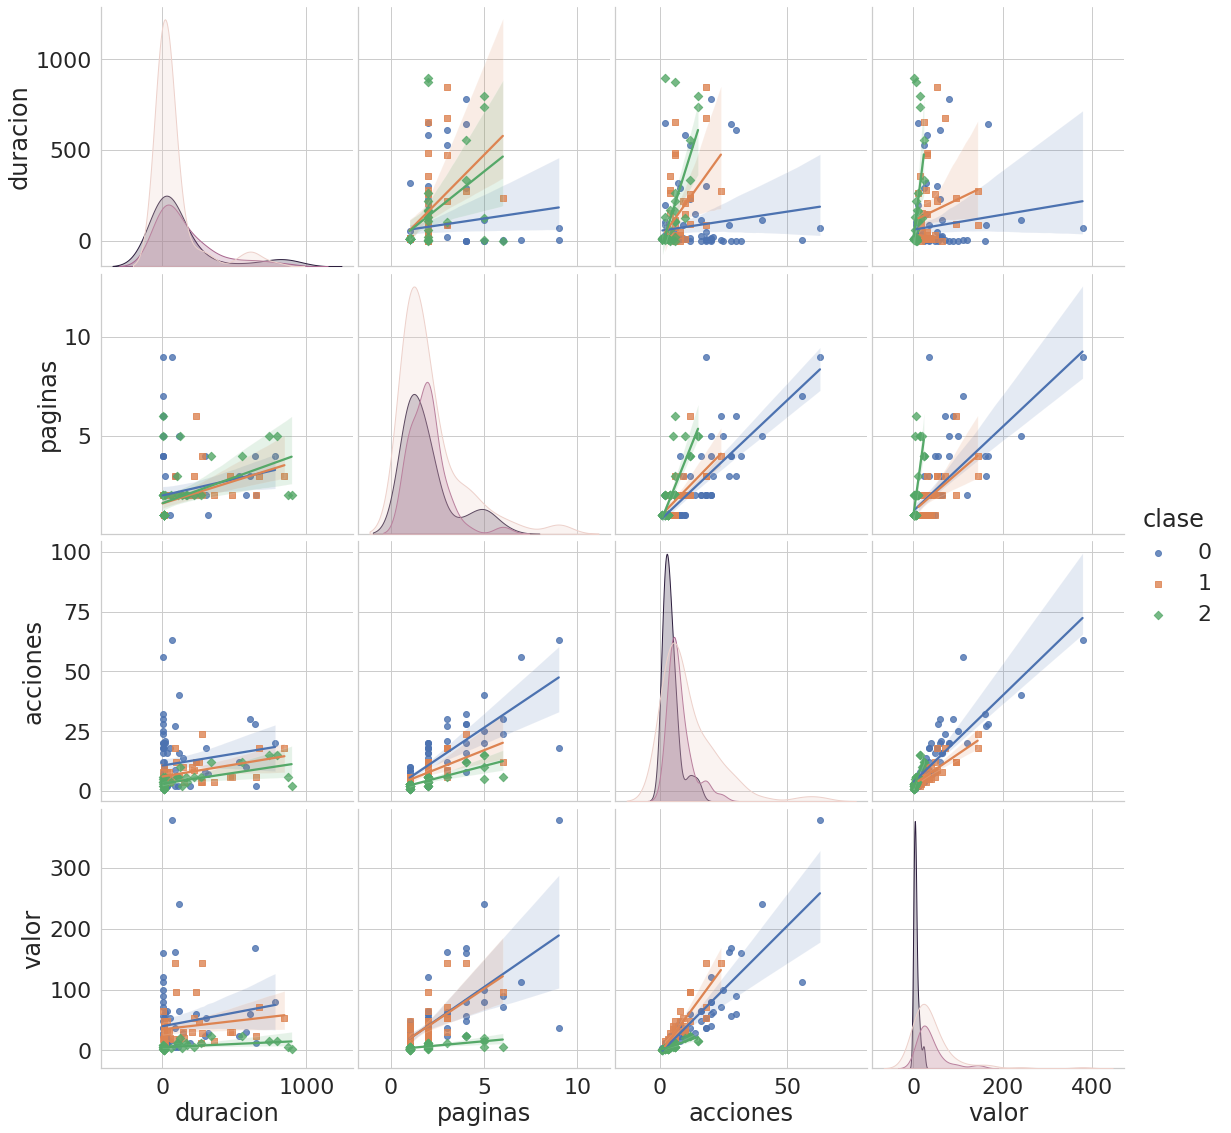

In [ ]:
sb.pairplot(dataframe.dropna(), 
            hue='clase',
            height=4,
            vars=["duracion", "paginas","acciones","valor"],
            kind='reg',  
            markers=["o", "s", "D"])

In [ ]:
X = 2
y=4
X= np.array(dataframe.drop(['clase'],1))
y=np.array(dataframe['clase'])
X.shape
X.dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


dtype('float64')

In [ ]:
model = linear_model.LogisticRegression(max_iter=700)
model.fit(X,y)
predictions = model.predict(X)
print(predictions[::5])

[2 2 2 2 0 1 1 2 0 1 0 0 0 0 0 1 0 0 0 2 0 0 2 2 2 2 0 0 0 2 0 2 0 0]


In [ ]:
model.score(X,y)

0.7764705882352941

In [ ]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

name='Logistic Regression'
kfold=model_selection.KFold(n_splits=10)
cv_results=model_selection.cross_val_score(model,
                                           X_train, Y_train, cv=kfold,
                                           scoring='accuracy')
msg="%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.728571 (0.094186)


In [ ]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.8529411764705882


In [ ]:
print(confusion_matrix(Y_validation, predictions))

[[16  1  1]
 [ 3  3  0]
 [ 0  0 10]]


[[16  1  1]
 [ 3  3  0]
 [ 0  0 10]]


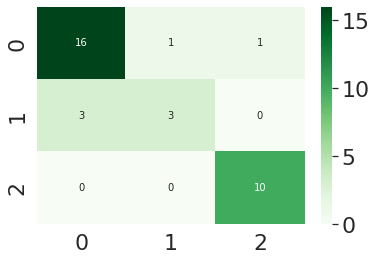

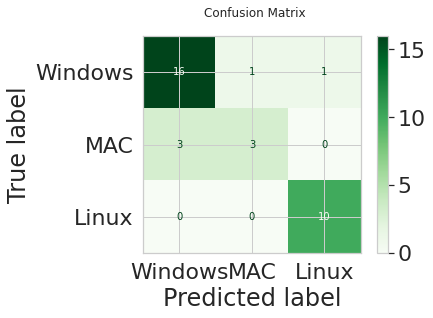

In [ ]:
import seaborn as sns
cnfMat=confusion_matrix(Y_validation,predictions)
print(cnfMat)
confusion_df=pd.DataFrame(cnfMat, index=range(3),columns=range(3))
axes=sns.heatmap(confusion_df,annot=True,cmap='Greens') #matriz de confusión sin leyenda
#matriz de confusión con leyendas
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
categorias = ["Windows","MAC","Linux"]
fig=ConfusionMatrixDisplay.from_estimator(model, X_validation, Y_validation,display_labels=categorias, cmap="Greens")  
fig.figure_.suptitle("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       0.75      0.50      0.60         6
           2       0.91      1.00      0.95        10

    accuracy                           0.85        34
   macro avg       0.83      0.80      0.81        34
weighted avg       0.85      0.85      0.84        34



Entregable para la sección
1. Modifique la cantidad de iteraciones. ¿Se produjo alg´un cambio?

No prudujo ningún cambio.

2. ¿Qu´e nos indica la matriz de confusi´on calculada?

La matriz nos indica la cantidad de veces de la predicción contra la realidad, y resulta una precisión de 85%.

In [5]:
#parte 4

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier() #valor k, defeault 5
#knn=KNeighborsClassifier(n_neighbors=9, weights='distance')

%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     digits.data, digits.target, random_state=11)
knn.fit(X=X_train, y=y_train) #entrenar el modelo
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [ ]:
print(f'{knn.score(X_test, y_test):.2%}')


97.78%


In [ ]:
#prediciendo una clase del dataset
predicted = knn.predict(X=X_test)
expected = y_test
predicted[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6])

In [ ]:
expected[:20]


array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6])

In [ ]:
#report de clasisficación
from sklearn.metrics import classification_report
names = [str(digit) for digit in digits.target_names]
print(classification_report(expected, predicted,
                            target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        45
           2       0.98      1.00      0.99        54
           3       0.95      0.95      0.95        44
           4       0.98      0.98      0.98        50
           5       0.97      1.00      0.99        38
           6       1.00      1.00      1.00        42
           7       0.96      1.00      0.98        45
           8       0.97      0.89      0.93        44
           9       0.98      0.95      0.96        43

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [ ]:
#matriz de confusión
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
confusion

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  1,  1,  2,  0,  0,  0,  0, 39,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 41]])

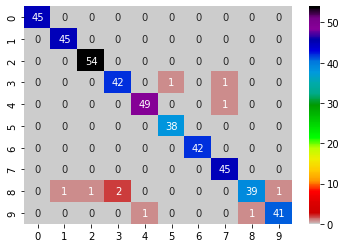

In [ ]:
import pandas as pd
confusion_df = pd.DataFrame(confusion, index=range(10),
     columns=range(10))
import seaborn as sns
axes = sns.heatmap(confusion_df, annot=True, 
                    cmap='nipy_spectral_r')

In [ ]:
#parte 5
#Ejemplo de Prediccion Utilizando Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target
#print(digits)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     digits.data, digits.target, random_state=11)  #random_state definir semilla
rf.fit(X=X_train, y=y_train) #entrenar el modelo

RandomForestClassifier()

In [ ]:
print(f'{rf.score(X_test, y_test):.2%}')

96.89%


In [ ]:
#prediciendo una clase del dataset
predicted = rf.predict(X=X_test)
expected = y_test
predicted[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6])

In [ ]:
expected[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6])

In [ ]:
#report de clasisficación
from sklearn.metrics import classification_report
names = [str(digit) for digit in digits.target_names]
print(classification_report(expected, predicted,
                            target_names=names))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.92      1.00      0.96        45
           2       0.98      0.98      0.98        54
           3       0.98      0.93      0.95        44
           4       0.98      1.00      0.99        50
           5       0.95      0.97      0.96        38
           6       1.00      0.98      0.99        42
           7       0.94      0.98      0.96        45
           8       0.97      0.89      0.93        44
           9       0.98      0.98      0.98        43

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



In [ ]:
#matriz de confusión
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
confusion

array([[44,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 53,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 41,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 50,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  1, 41,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 44,  0,  1],
       [ 0,  2,  1,  1,  0,  0,  0,  1, 39,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 42]])

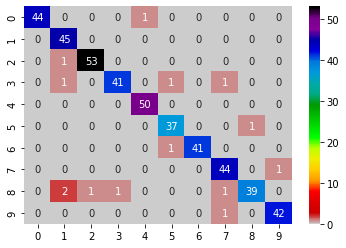

In [ ]:
import pandas as pd
confusion_df = pd.DataFrame(confusion, index=range(10),
     columns=range(10))
import seaborn as sns
axes = sns.heatmap(confusion_df, annot=True, 
                    cmap='nipy_spectral_r')

In [ ]:
#parte 6 Support Vector Machines SVM

%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     digits.data, digits.target, random_state=11)

from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8, gamma='auto')
#svclassifier = SVC(kernel='rbf', degree=8, gamma='auto')
svclassifier.fit(X=X_train, y=y_train)


SVC(degree=8, gamma='auto', kernel='poly')

In [ ]:
#haciendo predicción
predicted = svclassifier.predict(X=X_test)
expected = y_test
predicted[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6])

In [ ]:
expected[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6])

In [ ]:
# Listado de predicciones equivocadas
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]
wrong

[(5, 3),
 (9, 7),
 (6, 8),
 (1, 4),
 (4, 9),
 (7, 3),
 (1, 7),
 (8, 1),
 (8, 3),
 (9, 8),
 (9, 8),
 (8, 1),
 (6, 8),
 (9, 8),
 (4, 1),
 (3, 8),
 (1, 8)]

In [ ]:
# Precisión lograda por el clasificador
print(f'{svclassifier.score(X_test, y_test):.2%}')

96.22%


In [ ]:
#matriz de confusión
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
confusion

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  1,  0,  0,  0,  2,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 41,  0,  1,  0,  1,  1,  0],
       [ 0,  1,  0,  0, 49,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 43,  0,  1],
       [ 0,  1,  0,  1,  0,  0,  2,  0, 37,  3],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0, 42]])

In [ ]:
#reporte de clasificación
from sklearn.metrics import classification_report

names = [str(digit) for digit in digits.target_names]

print(classification_report(expected, predicted, 
       target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.93      0.93      0.93        45
           2       1.00      1.00      1.00        54
           3       0.98      0.93      0.95        44
           4       0.96      0.98      0.97        50
           5       0.97      1.00      0.99        38
           6       0.95      1.00      0.98        42
           7       0.98      0.96      0.97        45
           8       0.93      0.84      0.88        44
           9       0.91      0.98      0.94        43

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



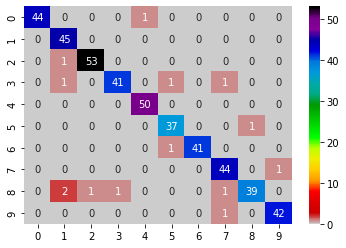

In [ ]:
#matriz de confusión 
import pandas as pd
confusion_df = pd.DataFrame(confusion, index=range(10),
     columns=range(10))

import seaborn as sns
axes = sns.heatmap(confusion_df, annot=True, 
                    cmap='nipy_spectral_r')

In [ ]:
#evaluar dataset con el estimador SVM
from sklearn.model_selection import cross_val_score
scores=cross_val_score(estimator=svclassifier, 
                      X=digits.data, y=digits.target,
                      cv=kfold)
scores

array([0.97222222, 0.96666667, 0.95      , 0.96666667, 0.97222222,
       0.97222222, 0.99444444, 0.98324022, 1.        , 0.97765363])

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=25, random_state=11, shuffle=True)
#ejecutar varios modelos para encontrar el mejor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# Instancias de Clasificadores a evaluar
estimators = {
     'KNeighborsClassifier': KNeighborsClassifier(), 
     'SVC': svclassifier,
     'GaussianNB': GaussianNB()}

for estimator_name, estimator_object in estimators.items():
     kfold = KFold(n_splits=10, random_state=11, shuffle=True)
     scores = cross_val_score(estimator=estimator_object, 
         X=digits.data, y=digits.target, cv=kfold)
     print(f'{estimator_name:>20}: ' + 
           f'mean accuracy={scores.mean():.2%}; ' +
           f'standard deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=98.78%; standard deviation=0.74%
                 SVC: mean accuracy=97.55%; standard deviation=1.36%
          GaussianNB: mean accuracy=84.48%; standard deviation=3.47%


In [ ]:
print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 97.55%


In [ ]:
print(f'Accuracy standard deviation: {scores.std():.2%}')

Accuracy standard deviation: 1.36%


In [ ]:
#parte 7  Perceptrones
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
# carga del dataset iris desde sklearn
iris_data = load_iris()
X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
y = iris_data.target

# Obtener los nombres de las clases
iris_data.target_names
#iris_data


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
# train/test split 
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size=0.3)

# se utiliza para escalar los valores en un mismo rango
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

#clf=MLPClassifier(hidden_layer_sizes=(256, 128,64,32),
clf=MLPClassifier(hidden_layer_sizes=(512,256, 128,64,32),
                  activation="relu",
                  random_state=1)
clf.fit(X_trainscaled, y_train)

MLPClassifier(hidden_layer_sizes=(512, 256, 128, 64, 32), random_state=1)

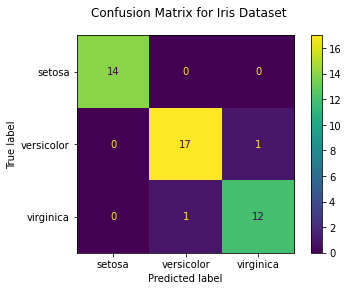

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
#crear matriz de confusión
fig=ConfusionMatrixDisplay.from_estimator(clf, X_testscaled,
                                          y_test,display_labels=iris_data.target_names)
fig.figure_.suptitle("Confusion Matrix for Iris Dataset")
plt.show()

In [ ]:
#parte 8 emsamble de clasificadores
# Ensamble de Clasificadores mediante Voting
import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
# Carga y divisi´on del dataset
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# Instacia de Clasificadores/Estimadores
log_clf = LogisticRegression(solver="liblinear",random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
rnd_clf2 = RandomForestClassifier(n_estimators=50, random_state=42)
# Definici´on y entrenamiento del estimador
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf),
('rf2', rnd_clf2)],voting='hard')#VotingClassifier, 88.80%
#('rf2', rnd_clf2)],voting='soft') #VotingClassifier, 88.80%
voting_clf.fit(X_train, y_train)
# Impresi´on de los accuracies individuales
for clf in (log_clf, rnd_clf, rnd_clf2, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(f'{clf.__class__.__name__}, {accuracy_score(y_test, y_pred):.2%}')

LogisticRegression, 86.40%
RandomForestClassifier, 87.20%
RandomForestClassifier, 89.60%
VotingClassifier, 88.80%


1. Copie y ejecute el c´odigo, anote cual ha sido el accuracy obtenido.
2. Cambie el enfoque de Hard Voting por Soft Voting y ejecute el c´odigo. Registre cual ha sido el
accuracy obtenido. ¿Mejor?, ¿Peor?
3. Modifique el c´odigo y utilice ahora los siguientes estimadores:
Regresión Logística,
Knn,
Random Forest,
SVM,
MLP
4. Cambie el dataset por el dataset Digits.
5. Ejecute su clasificador y registre el accuracy obtenido por el mismo.


In [ ]:
from sklearn import svm
# Ensamble de Clasificadores mediante Voting con regresión logística, Knn, Random Forest, SVM, MLP
import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression ###
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
knn=KNeighborsClassifier() #valor k, defeault 5
# Carga y divisi´on del dataset
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# Instacia de Clasificadores/Estimadores
log_clf = LogisticRegression(solver="liblinear",random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=5)
mlp_clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32), random_state=1, activation='relu')
svm_clf = svclassifier=SVC(kernel='poly', degree=8, gamma='auto')
# Definici´on y entrenamiento del estimador
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf), ('mlp', mlp_clf), ('svm', svm_clf)], voting='hard')#VotingClassifier, 88.80%
#('rf2', rnd_clf2)],voting='soft') #VotingClassifier, 88.80%
voting_clf.fit(X_train, y_train)
# Impresi´on de los accuracies individuales
for clf in (log_clf, rnd_clf, knn_clf, mlp_clf, svm_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(f'{clf.__class__.__name__}, {accuracy_score(y_test, y_pred):.2%}')

LogisticRegression, 86.40%
RandomForestClassifier, 87.20%
KNeighborsClassifier, 91.20%
MLPClassifier, 87.20%
SVC, 66.40%
VotingClassifier, 86.40%


In [ ]:
from sklearn import svm
# Ensamble de Clasificadores mediante Voting con regresión logística, Knn, Random Forest, SVM, MLP
import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression ###
from sklearn.model_selection import train_test_split
##from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_digits
# Carga y divisi´on del dataset
digits = load_digits()
X, y = digits.data, digits.target
##X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# Instacia de Clasificadores/Estimadores
log_clf = LogisticRegression(solver="liblinear",random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=50, random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=5)
mlp_clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32), random_state=1, activation='relu')
svm_clf = svclassifier=SVC(kernel='poly', degree=8, gamma='auto')
# Definici´on y entrenamiento del estimador
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf), ('mlp', mlp_clf), ('svm', svm_clf)], voting='hard')#VotingClassifier, 88.80%
#('rf2', rnd_clf2)],voting='soft') #VotingClassifier, 88.80%
voting_clf.fit(X_train, y_train)
# Impresi´on de los accuracies individuales
for clf in (log_clf, rnd_clf, knn_clf, mlp_clf, svm_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(f'{clf.__class__.__name__}, {accuracy_score(y_test, y_pred):.2%}')

LogisticRegression, 96.67%
RandomForestClassifier, 97.11%
KNeighborsClassifier, 99.33%
MLPClassifier, 98.00%
SVC, 97.78%
VotingClassifier, 98.67%
